# Diamond Price Prediction using KNN Regressor

## Introduction

The diamond dataset has target(price) which is continuous type so here we can predict the price of the diamond using supervised regressor algorithms. But according to my task i am using KNN regressor to predict diamond price both without using sckit-learn and with sklearn library.

### About Features

* 1. price : price in US dollars (\$326--\$18,823)
* 2. carat : weight of the diamond (0.2--5.01)
* 3. cut   : quality of the cut (Fair, Good, Very Good, Premium, Ideal)
* 4. color : diamond colour, from J (worst) to D (best)
* 5. clarity : a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
* 6. x : length in mm (0--10.74)
* 7. y : width in mm (0--58.9)
* 8. z : depth in mm (0--31.8)
* 9. depth : total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
* 10. table : width of top of diamond relative to widest point (43--95)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')

### Load dataset

In [2]:
df = pd.read_csv('diamonds.csv')
df.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [3]:
df.shape

(53940, 10)

There are 53940 rows and 10 columns in the given dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [5]:
df.describe()

carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

Minimum value of x, y and z are zero, hence there are faulty values, so we need to filter.

## EDA  

In [6]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [7]:
df.duplicated().sum()

146

In [8]:
print(df['cut'].unique().tolist())
print(df['clarity'].unique().tolist())
print(df['color'].unique().tolist())

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
['E', 'I', 'J', 'H', 'F', 'G', 'D']


### Univariate Analysis

In [9]:
numeric_col = df.select_dtypes(include=[np.number])
categorical_col = df.select_dtypes(exclude=[np.number])

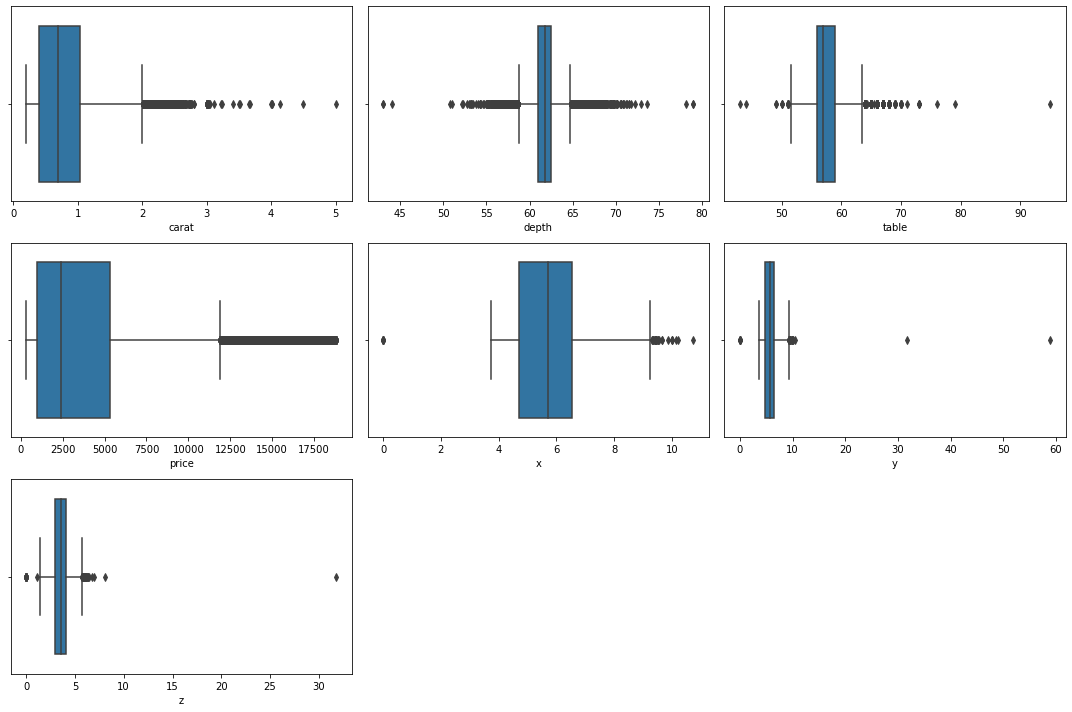

In [10]:
plt.figure(figsize=(15,10), facecolor='white')
plotnumber = 1

for col in numeric_col:
    if plotnumber <= 7:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(numeric_col[col].dropna(axis = 0))
    plotnumber+=1
plt.tight_layout() 

In [11]:
def pdf_plot(column):
    plt.figure(figsize=(8,5), facecolor='white')
    sns.distplot(column.dropna(axis = 0),color='g',kde = True,bins = 20)
    plt.axvline(column.dropna(axis = 0).mean(), color = 'black', label ='Mean')
    plt.legend()
    skewed_value=round(column.skew(),2)
    kurtosis_value=round(column.kurt(),2)
    print('Skewness in "%s" is %s' %(col, skewed_value))
    print('Kurtosis in "%s" is %s' %(col, kurtosis_value))

Skewness in "z" is 1.12
Kurtosis in "z" is 1.26


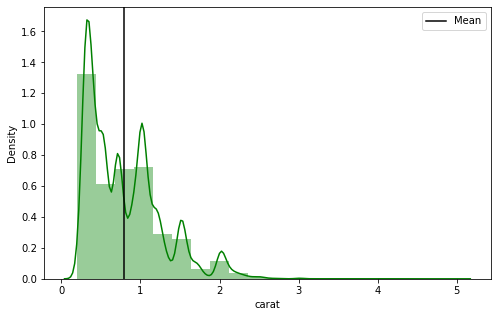

In [12]:
pdf_plot(numeric_col.carat)

Skewness in "z" is -0.08
Kurtosis in "z" is 5.74


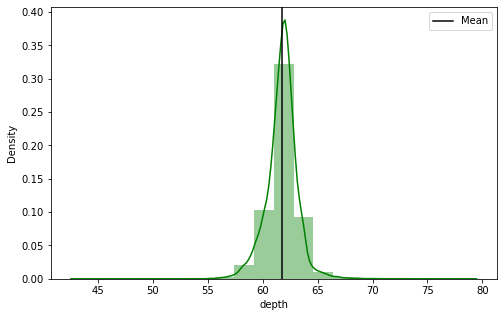

In [13]:
pdf_plot(numeric_col.depth)

Skewness in "z" is 0.8
Kurtosis in "z" is 2.8


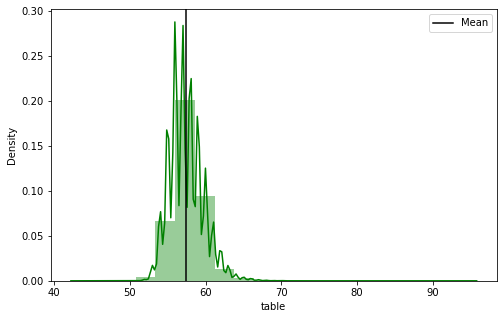

In [14]:
pdf_plot(numeric_col.table)

Skewness in "z" is 1.62
Kurtosis in "z" is 2.18


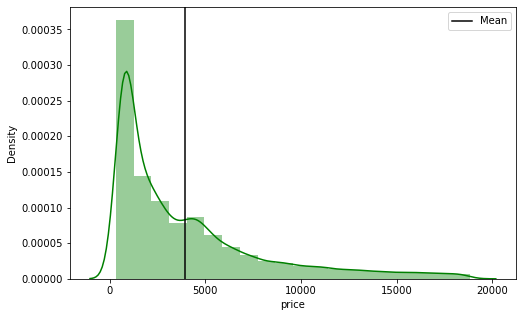

In [15]:
pdf_plot(numeric_col.price)

Skewness in "z" is 2.43
Kurtosis in "z" is 91.21


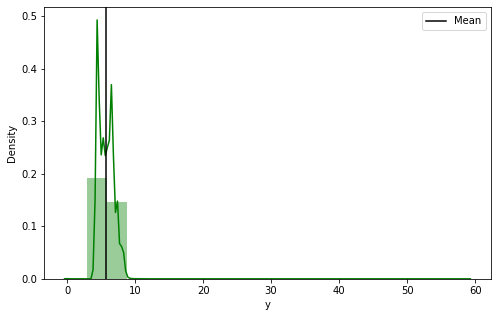

In [16]:
pdf_plot(numeric_col.y)

Skewness in "z" is 1.52
Kurtosis in "z" is 47.09


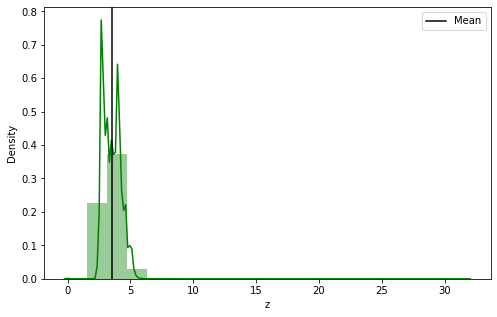

In [17]:
pdf_plot(numeric_col.z)

#### To understand the frequency distribution of each categorical Variable/Column

<AxesSubplot:>

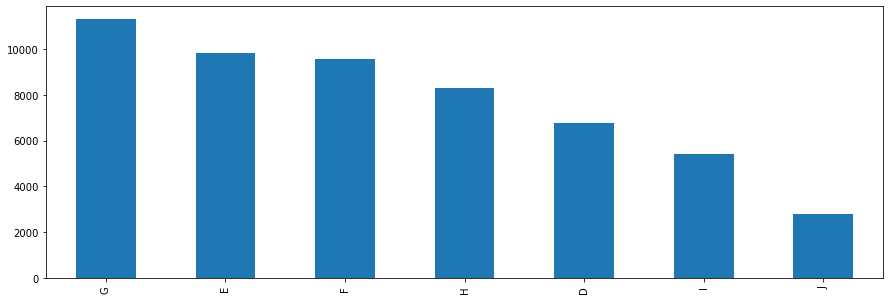

In [18]:
df.color.value_counts().plot(kind = 'bar',figsize = (15,5))

<AxesSubplot:>

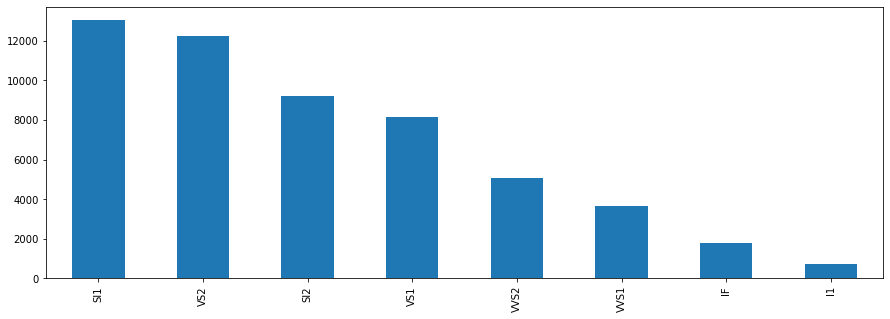

In [19]:
df.clarity.value_counts().plot(kind = 'bar',figsize = (15,5))

### Bivariate Analysis

<AxesSubplot:xlabel='carat', ylabel='price'>

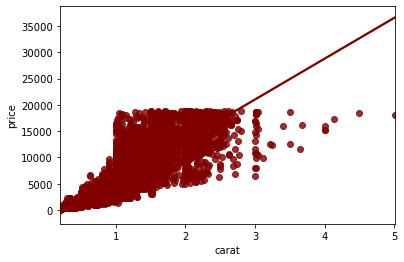

In [20]:
sns.regplot(x = 'carat',y ='price',data =df,color='maroon')

<AxesSubplot:xlabel='depth', ylabel='price'>

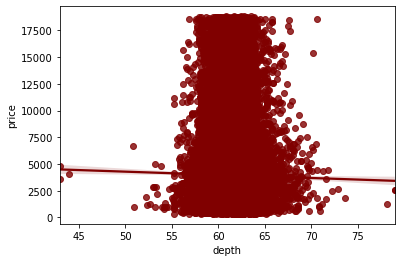

In [21]:
sns.regplot(x = 'depth',y ='price',data =df,color='maroon')

<AxesSubplot:xlabel='table', ylabel='price'>

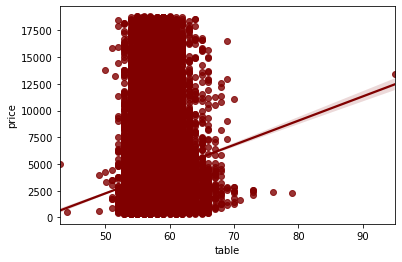

In [22]:
sns.regplot(x = 'table',y ='price',data =df,color='maroon')

<AxesSubplot:xlabel='x', ylabel='price'>

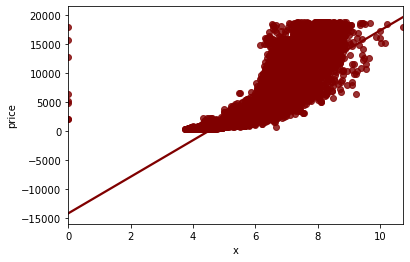

In [23]:
sns.regplot(x = 'x',y ='price',data =df,color='maroon')

<AxesSubplot:xlabel='y', ylabel='price'>

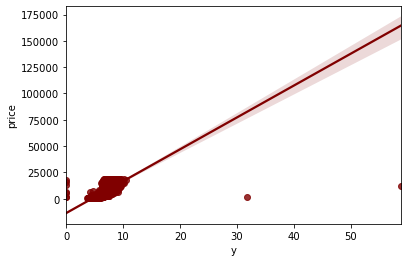

In [24]:
sns.regplot(x = 'y',y ='price',data =df,color='maroon')

<AxesSubplot:xlabel='z', ylabel='price'>

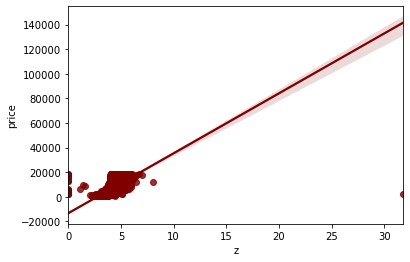

In [25]:
sns.regplot(x = 'z',y ='price',data =df,color='maroon')

<AxesSubplot:xlabel='clarity', ylabel='price'>

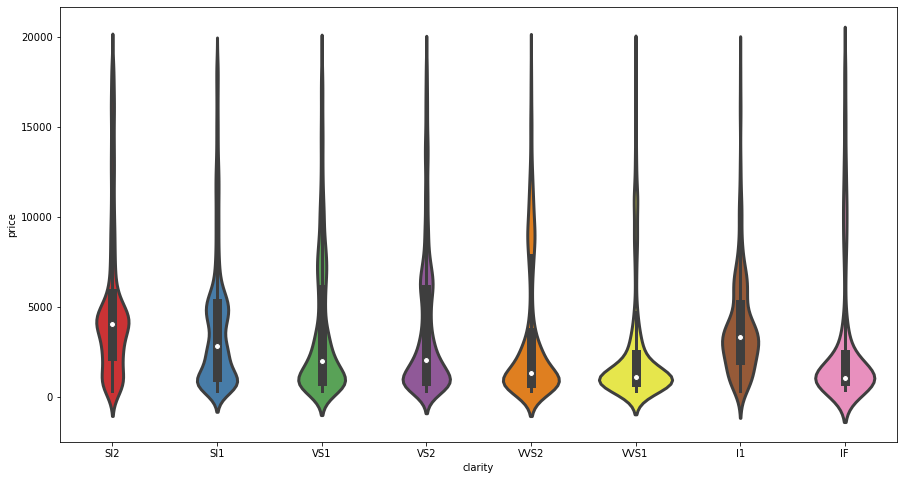

In [26]:
plt.figure(figsize=(15,8))
sns.violinplot(y='price',data=df,x='clarity',palette ='Set1', width =0.7,linewidth=3)

<AxesSubplot:xlabel='cut', ylabel='price'>

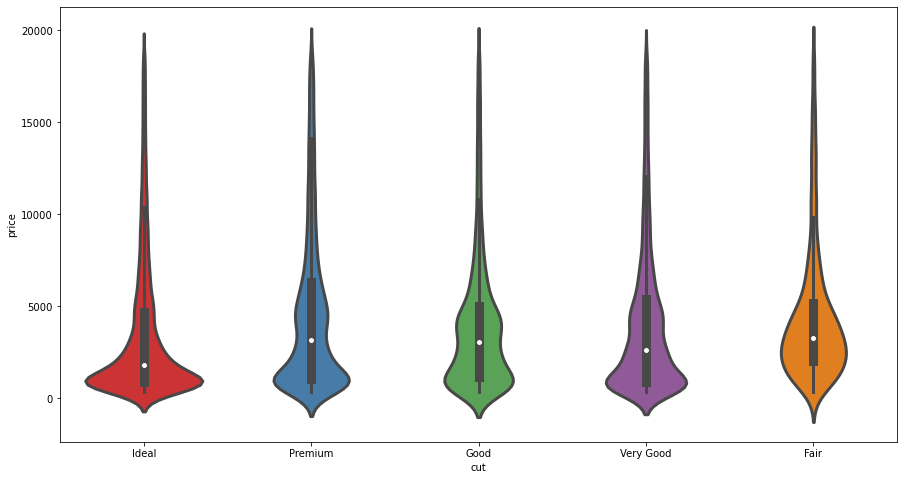

In [27]:
plt.figure(figsize=(15,8))
sns.violinplot(y='price',data=df,x='cut',palette ='Set1', width =0.7,linewidth=3)

<AxesSubplot:xlabel='color', ylabel='price'>

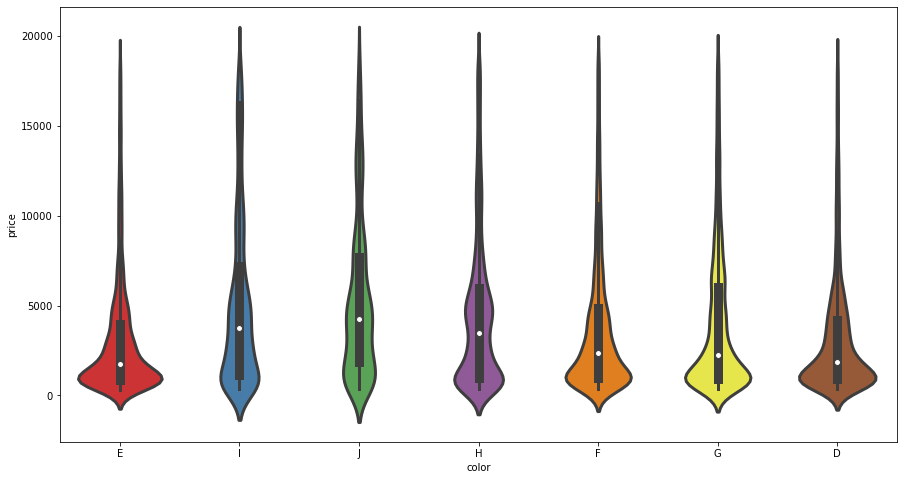

In [28]:
plt.figure(figsize=(15,8))
sns.violinplot(y='price',data=df,x='color',palette ='Set1', width =0.7,linewidth=3)

## Data Preprocessing

#### steps invovled in data preprocessing
* Data cleaning
* Identifying and removing outliers
* Encoding categorical variables
* feature scaling

### Data Cleaning

In [29]:
df = df.drop(df[df['x']==0].index)
df = df.drop(df[df['y']==0].index)
df = df.drop(df[df['z']==0].index)
df.shape

(53920, 10)

### Identifying and removing outliers

In [30]:
#checking percentage/ amount of outliers

for i in numeric_col.columns:
  df.sort_values(by=i, ascending=True)
  q1, q3 = np.percentile(numeric_col[i], [25,75]) 
  iqr = q3-q1
  lower_bound = q1-(1.5*iqr)
  upper_bound = q3+(1.5*iqr)
  outlier_data = numeric_col[i][(numeric_col[i] < lower_bound) | (numeric_col[i] > upper_bound)] #creating a series of outlier data
  percentage = (outlier_data.count()/numeric_col[i].count())*100
  print('Outliers in "%s" is %.2f%% with count =  %.f\n' %(i, percentage, outlier_data.count()))
#   print('Percentiles in "%s" are: 25th = %.2f, 75th = %.2f, IQR = %.2f\n' % (i,q1, q3, iqr))

Outliers in "carat" is 3.50% with count =  1889

Outliers in "depth" is 4.72% with count =  2545

Outliers in "table" is 1.12% with count =  605

Outliers in "price" is 6.56% with count =  3540

Outliers in "x" is 0.06% with count =  32

Outliers in "y" is 0.05% with count =  29

Outliers in "z" is 0.09% with count =  49



#### Quantile-based Flooring and Capping for treating the outliers

0.5075212303566152


<AxesSubplot:xlabel='carat'>

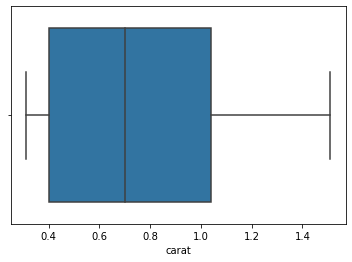

In [31]:
df["carat"] = np.where(df["carat"] <df['carat'].quantile(0.10), df['carat'].quantile(0.10),df['carat'])
df["carat"] = np.where(df["carat"] >df['carat'].quantile(0.90), df['carat'].quantile(0.90),df['carat'])
print(df['carat'].skew())
sns.boxplot(x='carat', data =df)

-0.22065310044990197


<AxesSubplot:xlabel='depth'>

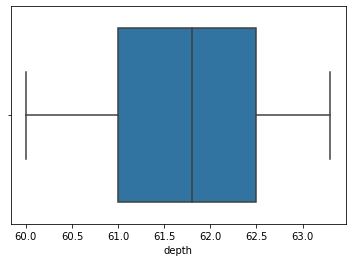

In [32]:
df["depth"] = np.where(df["depth"] <df['depth'].quantile(0.10), df['depth'].quantile(0.10),df['depth'])
df["depth"] = np.where(df["depth"] >df['depth'].quantile(0.90), df['depth'].quantile(0.90),df['depth'])
print(df['depth'].skew())
sns.boxplot(x='depth', data =df)

0.16614682539637984


<AxesSubplot:xlabel='table'>

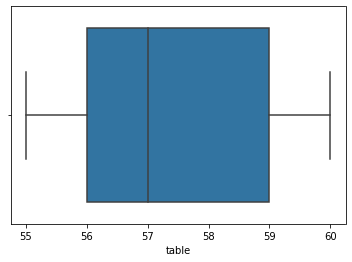

In [33]:
df["table"] = np.where(df["table"] <df['table'].quantile(0.10), df['table'].quantile(0.10),df['table'])
df["table"] = np.where(df["table"] >df['table'].quantile(0.90), df['table'].quantile(0.90),df['table'])
print(df['table'].skew())
sns.boxplot(x='table', data =df)

0.14303094736428798


<AxesSubplot:xlabel='x'>

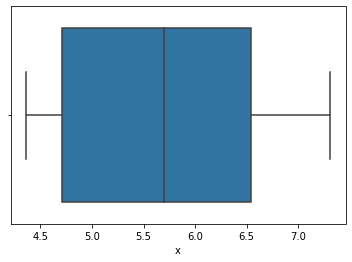

In [34]:
df["x"] = np.where(df["x"] <df['x'].quantile(0.10), df['x'].quantile(0.10),df['x'])
df["x"] = np.where(df["x"] >df['x'].quantile(0.90), df['x'].quantile(0.90),df['x'])
print(df['x'].skew())
sns.boxplot(x='x', data =df)

0.1362043748095725


<AxesSubplot:xlabel='y'>

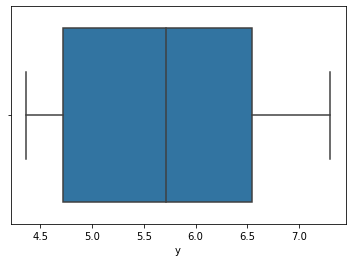

In [35]:
df["y"] = np.where(df["y"] <df['y'].quantile(0.10), df['y'].quantile(0.10),df['y'])
df["y"] = np.where(df["y"] >df['y'].quantile(0.90), df['y'].quantile(0.90),df['y'])
print(df['y'].skew())
sns.boxplot(x='y', data =df)

0.14062629245403652


<AxesSubplot:xlabel='z'>

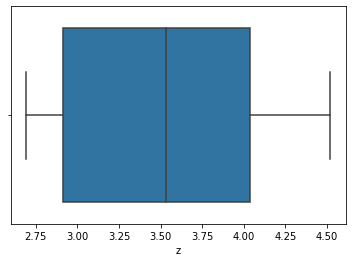

In [36]:
df["z"] = np.where(df["z"] <df['z'].quantile(0.10), df['z'].quantile(0.10),df['z'])
df["z"] = np.where(df["z"] >df['z'].quantile(0.90), df['z'].quantile(0.90),df['z'])
print(df['z'].skew())
sns.boxplot(x='z', data =df)

sns.pairplot(data = df,hue ='cut',palette = 'inferno')

### Encoding categorical variables

In [38]:
print(categorical_col.apply(lambda col: col.nunique()))

cut        5
color      7
clarity    8
dtype: int64


In [39]:
le =LabelEncoder()
df['cut'] = le.fit_transform(df.cut)
df['color'] = le.fit_transform(df.color)
df['clarity'] = le.fit_transform(df.clarity)

In [40]:
df.head()

carat  cut  color  clarity  depth  table  price     x     y     z
0   0.31    2      1        3   61.5   55.0    326  4.36  4.36  2.69
1   0.31    3      1        2   60.0   60.0    326  4.36  4.36  2.69
2   0.31    1      1        4   60.0   60.0    327  4.36  4.36  2.69
3   0.31    3      5        5   62.4   58.0    334  4.36  4.36  2.69
4   0.31    1      6        3   63.3   58.0    335  4.36  4.36  2.75

In [41]:
df.shape

(53920, 10)

In [42]:
df.describe()

carat           cut         color       clarity         depth  \
count  53920.000000  53920.000000  53920.000000  53920.000000  53920.000000   
mean       0.769807      2.553079      2.594028      3.835441     61.757711   
std        0.400278      1.027705      1.701272      1.724549      1.013560   
min        0.310000      0.000000      0.000000      0.000000     60.000000   
25%        0.400000      2.000000      1.000000      2.000000     61.000000   
50%        0.700000      2.000000      3.000000      4.000000     61.800000   
75%        1.040000      3.000000      4.000000      5.000000     62.500000   
max        1.510000      4.000000      6.000000      7.000000     63.300000   

              table         price             x             y             z  
count  53920.000000  53920.000000  53920.000000  53920.000000  53920.000000  
mean      57.354368   3930.993231      5.694978      5.696079      3.517213  
std        1.721157   3987.280446      1.009693      1.004278      0.625367  
min       55.000000    326.000000      4.360000      4.360000      2.690000  
25%       56.000000    949.000000      4.710000      4.720000      2.910000  
50%       57.000000   2401.000000      5.700000      5.710000      3.530000  
75%       59.000000   5323.250000      6.540000      6.540000      4.040000  
max       60.000000  18823.000000      7.310000      7.300000      4.520000

In [43]:
df.corrwith(df.price)

carat      0.889690
cut        0.039889
color      0.172431
clarity   -0.071570
depth     -0.010027
table      0.144686
price      1.000000
x          0.849305
y          0.849974
z          0.846915
dtype: float64

<AxesSubplot:>

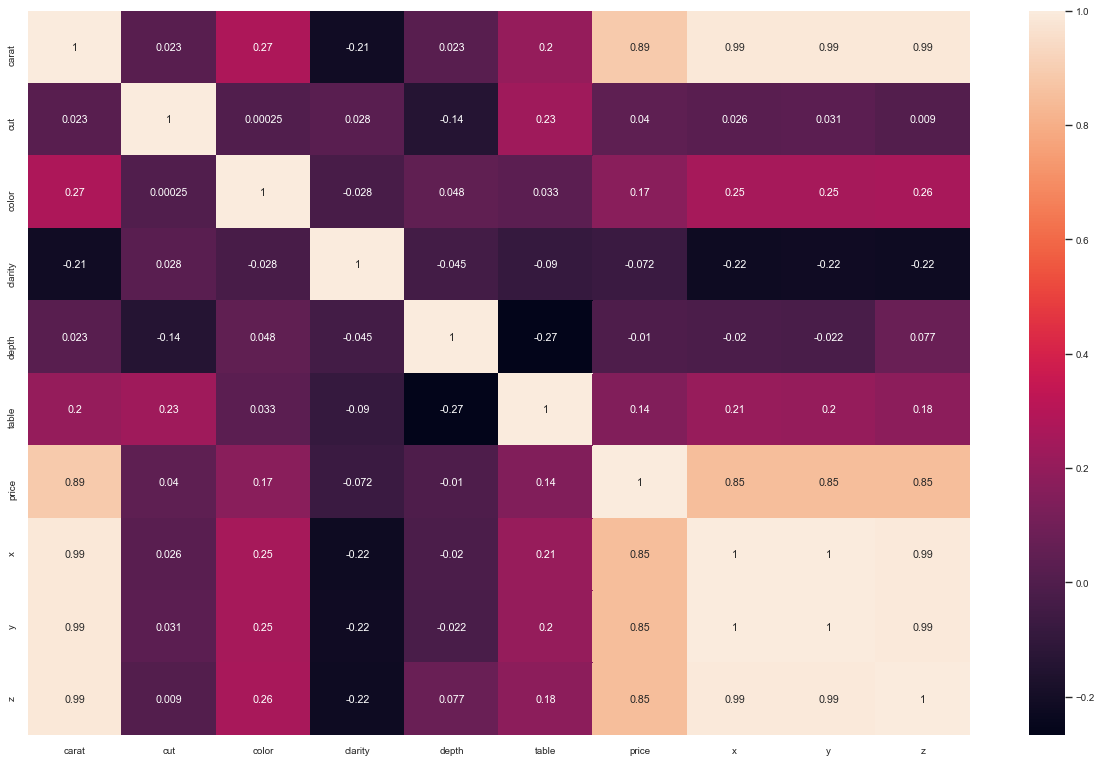

In [44]:
sns.set(font_scale=0.8)
plt.figure(figsize=(19, 12),dpi=80)
sns.heatmap(df.corr(), annot=True,)

#### Normalization

In [45]:
from sklearn.preprocessing import StandardScaler
columns = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']
scaler = StandardScaler()
df[columns] = scaler.fit_transform(df[columns])
df.head()

carat       cut     color   clarity     depth     table  price         x  \
0 -1.14873 -0.538173 -0.936971 -0.484445 -0.254266 -1.367911    326 -1.322175   
1 -1.14873  0.434877 -0.936971 -1.064312 -1.734212  1.537139    326 -1.322175   
2 -1.14873 -1.511224 -0.936971  0.095422 -1.734212  1.537139    327 -1.322175   
3 -1.14873  0.434877  1.414232  0.675289  0.633702  0.375119    334 -1.322175   
4 -1.14873 -1.511224  2.002033 -0.484445  1.521669  0.375119    335 -1.322175   

        y         z  
0 -1.3304 -1.322778  
1 -1.3304 -1.322778  
2 -1.3304 -1.322778  
3 -1.3304 -1.322778  
4 -1.3304 -1.226833

In [46]:
shuffle_index = np.random.permutation(df.shape[0])        #shuffling the row index of our dataset
df =df.iloc[shuffle_index]
df.head(5)

carat       cut     color   clarity     depth     table  price  \
43191 -0.773987 -0.538173 -0.936971  0.095422  0.436375 -1.367911   1393   
43024 -0.624090  1.407928 -0.936971 -0.484445  0.831028  0.375119   1372   
8967   0.650035  1.407928 -0.349170 -0.484445  0.633702  0.956129   4503   
33626 -1.098764  1.407928 -0.936971 -0.484445 -1.734212  0.956129    463   
2033   0.325258 -1.511224  0.826431 -0.484445  1.521669  0.375119   3105   

              x         y         z  
43191 -0.787353 -0.752865 -0.731120  
43024 -0.638792 -0.523843 -0.507249  
8967   0.678453  0.750716  0.772013  
33626 -1.213230 -1.200953 -1.322778  
2033   0.351618  0.322544  0.564133

In [47]:
X = df.drop('price',axis =1)
y = df['price']

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=39)

In [49]:
def find_neighbors(k, X_train,y_train,X_test):
    pred = np.zeros(X_test.shape[0])
    
    for i in range(X_test.shape[0]):
        train_dist =np.zeros(X_train.shape[0])
        
        for j in range(X_train.shape[0]):
            dist = np.sqrt(np.sum((X_train.values[j] - X_test.values[i])**2))
            print('j = {0} , distance = {1}'.format(j,dist))
            train_dist[j] = dist
            train_dist= train_dist.argsort()
            neighbors = y_train.values[train_dist[:k]]
            print('All_neighbors {},\n Nearest_neighbors {}'.format(y_train.values[train_dist],neighbors))
            
            pred[i] = np.mean(neighbors)
            print(pred[i])
    return pred

In [50]:
find_neighbors(5, X_train,y_train,X_test)

j = 0 , distance = 2.0629871580211248
All_neighbors [2159  961  447 ...  506  535 3154],
 Nearest_neighbors [2159  961  447 4830 4480]
2575.4
j = 1 , distance = 3.432218869413292
All_neighbors [ 844  555  827 ... 2817  707 2159],
 Nearest_neighbors [ 844  555  827 5662 4842]
2546.0
j = 2 , distance = 3.76716765484103
All_neighbors [  709  3121   447 ...  5539 14527  3154],
 Nearest_neighbors [ 709 3121  447  828 4830]
1987.0
j = 3 , distance = 3.0154877414948236
All_neighbors [ 844  827 5662 ...  506  707  709],
 Nearest_neighbors [ 844  827 5662 3121 4842]
3059.2
j = 4 , distance = 3.845805415570039
All_neighbors [  709   828   447 ...  5539 14527  3154],
 Nearest_neighbors [ 709  828  447 3121  662]
1153.4
j = 5 , distance = 4.17484361638632
All_neighbors [ 844 4842 5662 ... 5539  707 3941],
 Nearest_neighbors [ 844 4842 5662 3121  662]
3026.2
j = 6 , distance = 3.194758122653646
All_neighbors [3941  828 4830 ... 7826 1723 3154],
 Nearest_neighbors [3941  828 4830 3121 3910]
3326.0
j

KeyboardInterrupt: 

In [52]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_compare_model = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [53]:
print('KNN_model_score: ',(model.score(X_test, y_test)))
print('KNN_r2_score: ',r2_score(y_test, y_pred))
print('KNN_MAE: ',mean_absolute_error(y_test, y_pred))
print('KNN_MSE: ',mean_squared_error(y_test, y_pred))
print('KNN_RMSE: ',np.sqrt(mean_squared_error(y_test, y_pred)))
y_compare_model.head() 

KNN_model_score:  0.9020144435494402
KNN_r2_score:  0.9020144435494402
KNN_MAE:  577.739821958457
KNN_MSE:  1556926.6696617212
KNN_RMSE:  1247.768676342583


Actual  Predicted
52067    2454     2510.4
18237    7406    10815.4
41000    1183     1134.2
52824    2573     2642.8
21204    9346     9839.2

### Happy Learning!